In [1]:
import os
import re
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
#from keras.preprocessing.text import Tokenizer
#from keras.preprocessing import sequence
import nltk
import string
from nltk.corpus import stopwords

In [2]:
with open('News_Category_Dataset_v3.json','r') as f:
    jdata = f.read()

jdata2  = [json.loads(line) for line in jdata.split('\n') if line]
df = pd.DataFrame.from_records(jdata2)

In [3]:
display(df[0:3])

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23


In [4]:
df

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


In [5]:
top_7_categories = df['category'].value_counts().nlargest(7).index
print(top_7_categories)
data=df[['category','short_description']][df['category'].isin(top_7_categories)].reset_index(drop=True)
display(data['category'].value_counts())
# data

Index(['POLITICS', 'WELLNESS', 'ENTERTAINMENT', 'TRAVEL', 'STYLE & BEAUTY',
       'PARENTING', 'HEALTHY LIVING'],
      dtype='object')


POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
Name: category, dtype: int64

In [6]:
data

,category,short_description
0,PARENTING,"""Accidentally put grown-up toothpaste on my to..."
1,ENTERTAINMENT,"For the past 18 months, Hollywood has effectiv..."
2,POLITICS,President issues vow as tensions with China rise.
3,POLITICS,An annual celebration took on a different feel...
4,ENTERTAINMENT,"The ""Avatar"" director said aspects of his 2009..."
...,...,...
106103,WELLNESS,"My great-aunt Ida loves to say, ""This is only ..."
106104,STYLE & BEAUTY,"""A Look Back"" is a daily column that highlight..."
106105,PARENTING,Do you feel kids today are as responsible as k...
106106,ENTERTAINMENT,Representation of the collective diaspora has ...


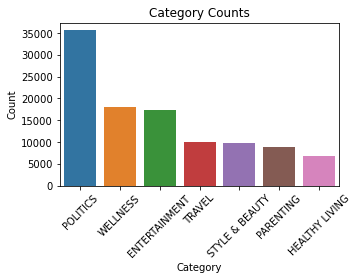

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

category_counts = data['category'].value_counts()

# Create a bar plot (histogram) of the category counts using seaborn
plt.figure(figsize=(5, 3))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Counts')
plt.xticks(rotation=45)
plt.show()

In [8]:
data

,category,short_description
0,PARENTING,"""Accidentally put grown-up toothpaste on my to..."
1,ENTERTAINMENT,"For the past 18 months, Hollywood has effectiv..."
2,POLITICS,President issues vow as tensions with China rise.
3,POLITICS,An annual celebration took on a different feel...
4,ENTERTAINMENT,"The ""Avatar"" director said aspects of his 2009..."
...,...,...
106103,WELLNESS,"My great-aunt Ida loves to say, ""This is only ..."
106104,STYLE & BEAUTY,"""A Look Back"" is a daily column that highlight..."
106105,PARENTING,Do you feel kids today are as responsible as k...
106106,ENTERTAINMENT,Representation of the collective diaspora has ...


In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=42)

In [10]:
train['text_len'] = train.short_description.apply(len)
print(train['text_len'].sort_values(ascending=False))


34187    1472
31842    1361
32637    1286
34718    1168
33899    1155
         ... 
51742       0
49906       0
59820       0
57850       0
55989       0
Name: text_len, Length: 84886, dtype: int64


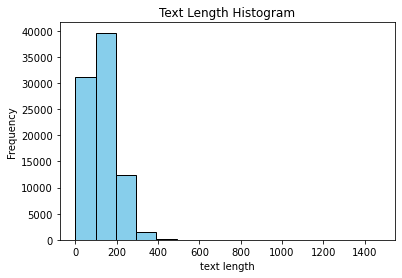

In [11]:
# Filter 'text_len' values to only include those up to 1500
filtered_text_len = train['text_len'][train['text_len'] <= 1500]

# Create a histogram for 'text_len'
plt.hist(filtered_text_len, bins=15, color='skyblue', edgecolor='black')
plt.xlabel('text length')
plt.ylabel('Frequency')
plt.title('Text Length Histogram')
plt.show()


In [12]:
## clean_text
from nltk.stem import WordNetLemmatizer

import string
from nltk.corpus import stopwords

In [13]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vibhuti\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

train['clean_text'] = train['short_description'].apply(clean_text)
test['clean_text'] = test['short_description'].apply(clean_text)

## remove_stopwords

stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

def remove_stopwords(text):
    words = text.split(' ')
    words = [word for word in words if word not in stop_words]
    text = ' '.join(words)
    return text

train['clean_text'] = train['clean_text'].apply(remove_stopwords)
test['clean_text'] = test['clean_text'].apply(remove_stopwords)

##  stemm_text

import nltk

stemmer = nltk.SnowballStemmer("english")

def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

train['clean_text'] = train['clean_text'].apply(stemm_text)
test['clean_text'] = test['clean_text'].apply(stemm_text)


## preprocess_data

def preprocess_data(text):
    # Clean puntuation, urls, and so on
    text = clean_text(text)
    # Remove stopwords
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    # Stemm all the words in the sentence
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
#     text = ' '.join(lemmatizer.lemmatize(word) for word in text.split(' '))

    return text

train['clean_text'] = train['clean_text'].apply(preprocess_data)
test['clean_text'] = test['clean_text'].apply(preprocess_data)

In [15]:
train

,category,short_description,text_len,clean_text
91817,WELLNESS,Have a health goal in mind? Sometimes it can s...,121,health goal mind sometim seem like youll never...
31436,ENTERTAINMENT,"Meanwhile, you continued to star in zero movies.",48,meanwhil continu star zero movi
101331,WELLNESS,"If change is vibration, a shift in chords crea...",195,chang vibrat shift chord creat anoth song enti...
88598,WELLNESS,By Ransdell Pierson Patients taking bedaquilin...,120,ransdel pierson patient take bedaquilin also i...
70360,STYLE & BEAUTY,"Timberland Women's 6"" Premium Boot, $134; Hat ...",120,timberland women premium boot hat attack ove...
...,...,...,...,...
54886,POLITICS,Who do you think Doane Robinson would have cho...,174,think doan robinson would chosen mount rushmor...
76820,STYLE & BEAUTY,"Come on now, don’t be a flip-flopper. Because ...",125,come dont flipflopp come summer footwear comm...
103694,STYLE & BEAUTY,"Article by: Clarissa Burt, Brooke Smith and Em...",120,articl clarissa burt brook smith emili beth iv...
860,POLITICS,"""The Daily Show"" host used the rumored celebri...",151,daili show host use rumor celebr romanc make p...


In [16]:
# pip install WordCloud

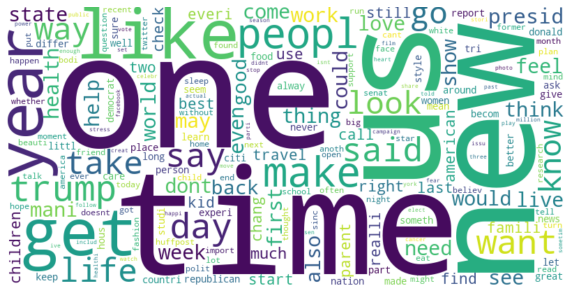

In [17]:
from wordcloud import WordCloud
clean_text_data = train['clean_text'].str.cat(sep=' ')
tokens = clean_text_data.split() 
word_freq = pd.Series(tokens).value_counts()
    
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [18]:
train['clean_text'] 

91817     health goal mind sometim seem like youll never...
31436                       meanwhil continu star zero movi
101331    chang vibrat shift chord creat anoth song enti...
88598     ransdel pierson patient take bedaquilin also i...
70360     timberland women  premium boot  hat attack ove...
                                ...                        
54886     think doan robinson would chosen mount rushmor...
76820     come dont flipflopp come summer footwear  comm...
103694    articl clarissa burt brook smith emili beth iv...
860       daili show host use rumor celebr romanc make p...
15795     jame dorsey us presid donald j trump step coul...
Name: clean_text, Length: 84886, dtype: object

In [19]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = TfidfVectorizer()
#fit_transform for train data
X_train_tf = vectorizer.fit_transform(train['clean_text'])
y_train_tf = train['category']
#transform for test data
X_test_tf = vectorizer.transform(test['clean_text'])
y_test_tf = test['category']

In [20]:
X_train_tf

<84886x39249 sparse matrix of type '<class 'numpy.float64'>'
	with 922438 stored elements in Compressed Sparse Row format>

XGBoost Model Accuracy: 0.6534256903213647
XGBoost Model Classification Report:
                precision    recall  f1-score   support

 ENTERTAINMENT       0.65      0.36      0.46      3512
HEALTHY LIVING       0.62      0.03      0.06      1318
     PARENTING       0.70      0.60      0.65      1769
      POLITICS       0.60      0.93      0.73      7216
STYLE & BEAUTY       0.82      0.61      0.70      1949
        TRAVEL       0.79      0.58      0.67      1966
      WELLNESS       0.67      0.70      0.68      3492

      accuracy                           0.65     21222
     macro avg       0.69      0.55      0.57     21222
  weighted avg       0.67      0.65      0.62     21222



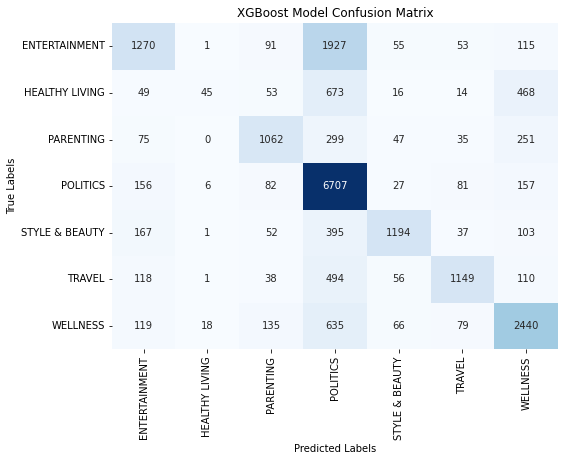

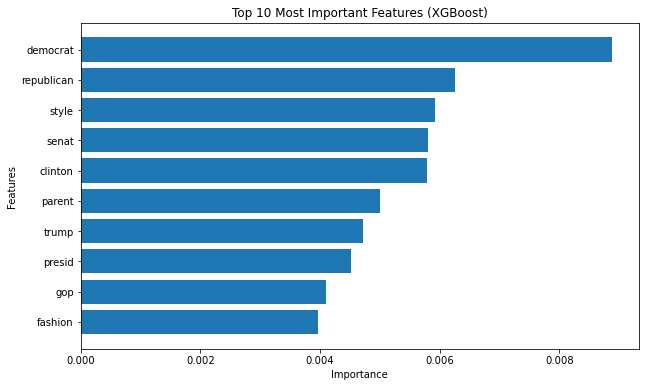

In [23]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import CountVectorizer

def get_top_features(vectorizer, bow_matrix, top_n=6000):
    feature_names = vectorizer.get_feature_names_out()
    word_frequencies = bow_matrix.sum(axis=0).A1
    top_features_indices = word_frequencies.argsort()[-top_n:][::-1]
    return [feature_names[i] for i in top_features_indices]

top_features = get_top_features(vectorizer, X_train_tf, top_n=6000)

# Create a new CountVectorizer object with only the top 6000 features
vectorizer_top = CountVectorizer(vocabulary=top_features)

# Transform the training and test data using the new vectorizer with top features
X_train_top = vectorizer_top.fit_transform(train['clean_text'])
X_test_top = vectorizer_top.transform(test['clean_text'])

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Convert the string labels to numeric labels
y_train_encoded = label_encoder.fit_transform(y_train_tf)
y_test_encoded = label_encoder.transform(y_test_tf)

# Train the XGBoost classifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train_top, y_train_encoded)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test_top)

# Convert the numeric predictions back to original string labels
y_pred_xgb_labels = label_encoder.inverse_transform(y_pred_xgb)

# Evaluate the model's performance
accuracy_xgb = accuracy_score(y_test_tf, y_pred_xgb_labels)
print("XGBoost Model Accuracy:", accuracy_xgb)

print("XGBoost Model Classification Report:")
print(classification_report(y_test_tf, y_pred_xgb_labels))

cm_xgb = confusion_matrix(y_test_tf, y_pred_xgb_labels)
class_names = sorted(y_test_tf.unique())
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.title('XGBoost Model Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Get feature importance from the trained XGBoost classifier
feature_importance_xgb = xgb_model.feature_importances_

# Pair the feature names with their corresponding importance scores
feature_importance_pairs_xgb = list(zip(top_features, feature_importance_xgb))

# Sort features based on importance scores in descending order
feature_importance_pairs_xgb.sort(key=lambda x: x[1], reverse=True)

# Extract the top 10 most important features and their importance scores
top_features_names_xgb, top_feature_importance_xgb = zip(*feature_importance_pairs_xgb[:10])

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features_names_xgb)), top_feature_importance_xgb, align='center')
plt.yticks(range(len(top_features_names_xgb)), top_features_names_xgb)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Most Important Features (XGBoost)')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features on top
plt.show()


In [24]:
X_train_top

<84886x6000 sparse matrix of type '<class 'numpy.int64'>'
	with 837191 stored elements in Compressed Sparse Row format>

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

# Create the CountVectorizer object
vectorizer = CountVectorizer()

# fit_transform for train data
X_train_bow = vectorizer.fit_transform(train['clean_text'])
y_train_bow = train['category']

# transform for test data
X_test_bow = vectorizer.transform(test['clean_text'])
y_test_bow = test['category']

XGBoost Model Accuracy: 0.65262463481293
XGBoost Model Classification Report:
                precision    recall  f1-score   support

 ENTERTAINMENT       0.64      0.37      0.47      3512
HEALTHY LIVING       0.59      0.03      0.06      1318
     PARENTING       0.70      0.60      0.65      1769
      POLITICS       0.60      0.93      0.73      7216
STYLE & BEAUTY       0.81      0.61      0.70      1949
        TRAVEL       0.79      0.58      0.67      1966
      WELLNESS       0.67      0.70      0.68      3492

      accuracy                           0.65     21222
     macro avg       0.69      0.55      0.57     21222
  weighted avg       0.66      0.65      0.62     21222



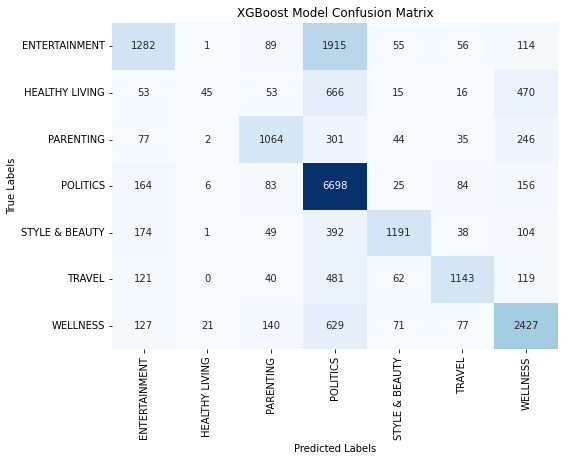

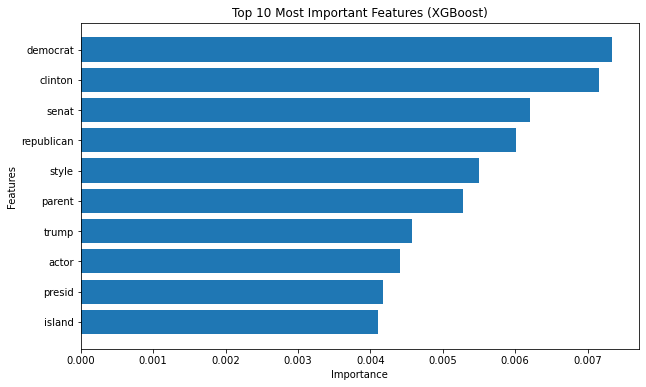

In [28]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import CountVectorizer

def get_top_features(vectorizer, bow_matrix, top_n=6000):
    feature_names = vectorizer.get_feature_names_out()
    word_frequencies = bow_matrix.sum(axis=0).A1
    top_features_indices = word_frequencies.argsort()[-top_n:][::-1]
    return [feature_names[i] for i in top_features_indices]

top_features = get_top_features(vectorizer, X_train_bow, top_n=6000)

# Create a new CountVectorizer object with only the top 6000 features
vectorizer_top = CountVectorizer(vocabulary=top_features)

# Transform the training and test data using the new vectorizer with top features
X_train_top = vectorizer_top.fit_transform(train['clean_text'])
X_test_top = vectorizer_top.transform(test['clean_text'])

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Convert the string labels to numeric labels
y_train_encoded = label_encoder.fit_transform(y_train_bow)
y_test_encoded = label_encoder.transform(y_test_bow)

# Train the XGBoost classifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train_top, y_train_encoded)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test_top)

# Convert the numeric predictions back to original string labels
y_pred_xgb_labels = label_encoder.inverse_transform(y_pred_xgb)

# Evaluate the model's performance
accuracy_xgb = accuracy_score(y_test_bow, y_pred_xgb_labels)
print("XGBoost Model Accuracy:", accuracy_xgb)

print("XGBoost Model Classification Report:")
print(classification_report(y_test_bow, y_pred_xgb_labels))

cm_xgb = confusion_matrix(y_test_bow, y_pred_xgb_labels)
class_names = sorted(y_test_bow.unique())
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.title('XGBoost Model Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Get feature importance from the trained XGBoost classifier
feature_importance_xgb = xgb_model.feature_importances_

# Pair the feature names with their corresponding importance scores
feature_importance_pairs_xgb = list(zip(top_features, feature_importance_xgb))

# Sort features based on importance scores in descending order
feature_importance_pairs_xgb.sort(key=lambda x: x[1], reverse=True)

# Extract the top 10 most important features and their importance scores
top_features_names_xgb, top_feature_importance_xgb = zip(*feature_importance_pairs_xgb[:10])

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features_names_xgb)), top_feature_importance_xgb, align='center')
plt.yticks(range(len(top_features_names_xgb)), top_features_names_xgb)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Most Important Features (XGBoost)')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features on top
plt.show()
